In [13]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import matplotlib as style
import pandas as pd
import datetime as dt



In [13]:
#style.use('ggplot')
#tickers = ['AAPL', 'MSFT', '^GSPC']
#start_date =dt.datetime(2010,1,1)
#end_date =dt.datetime(2016,12,31)
    
#panel_data = data.DataReader("AAPL", start_date, end_date)
    
#panel_data.to_frame().head(9)

In [31]:
from googlefinance import getQuotes
import googlefinance
import json

In [14]:
#help(googlefinance)

In [33]:
#help(json)

In [12]:
#p=getQuotes("AAPL")

# Intro and Getting Stock Price Data from morningstar

In [63]:
import pandas_datareader as web
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import datetime as dt

In [9]:
style.use('ggplot')
start=dt.datetime(2012,1,1)
end=dt.datetime(2017,1,1)

pakage_price=web.DataReader('AAL','morningstar', start,end) 
pakage_price.head()

Close    High     Low    Open    Volume
Symbol Date                                                
AAL    2012-01-02  0.9371  1.0013  0.8086  0.8568         0
       2012-01-03  0.7657  0.9076  0.7537  0.9063  17521255
       2012-01-04  0.6426  0.7973  0.6426  0.7797  14320964
       2012-01-05  0.8969  1.0011  0.6426  0.6560  12051346
       2012-01-06  1.0629  1.1084  0.8835  0.9234   9157793

unfortuniatly, google and yahoo don't work for   pandas_datareader.DataReader. It happends by yahoo and goole.

# Getting all company pricing data in the S&P 500

In [3]:
import bs4 as bs
import pickle
import requests

import datetime as dt
import os
import numpy as np

from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import pandas_datareader.data as  web

In [122]:
def SAVE_SP500_TICKERS():
    resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup=bs.BeautifulSoup(resp.text,'lxml')
    table=soup.find('table',{'class':"wikitable sortable"})
    tickers=[]
    for row in table.findAll('tr')[1:]:
        ticker=row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open('sp500tickers.pickle','wb') as f:
        pickle.dump(tickers,f)
        
    #print(tickers)
    
    return tickers


sa=SAVE_SP500_TICKERS()
print( len(sa))    

505


In [84]:
sa=SAVE_SP500_TICKERS()

print( len(sa))

505


In [7]:
type(sa)

list

In [176]:
#SAVE_SP500_TICKERS
# Getting all company pricing data in the S&P 500


def GET_DATA_FROM_GOOGLE(reload_sp500=False ):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')
        
    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = web.DataReader(ticker, 'morningstar', start, end)
            
            
            df.reset_index(inplace=True)
            df.set_index("Date", inplace=True)
            df = df.drop("Symbol", axis=1)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))
            
            
            

            
    

In [4]:

GET_DATA_FROM_GOOGLE() 


NameError: name 'GET_DATA_FROM_GOOGLE' is not defined

In [7]:
import bs4 as bs
import pickle
import requests

import datetime as dt
import os
import numpy as np

from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import pandas_datareader.data as  web
import pandas as pd

# Combining S&P 500 into one DataFrame, 7

In [55]:
def COMPILE_DATA():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        if os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            print(ticker)
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))
            df.rename(str.lower, axis='columns')
            if df.columns[0] == 'date':
                df.columns = ['Date','Open', 'High', 'Low', 'Close', 'Volume']
            df.set_index('Date', inplace=True)
            df.rename(columns={'Adj Close': ticker}, inplace=True)
            df.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

            if main_df.empty:
                main_df = df
            else:
                main_df = main_df.join(df, how='outer')

            if count % 10 == 0:
                print(count)
        
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')

     

In [56]:
main_df = COMPILE_DATA()

MMM
0
ABT
ABBV
ABMD
ACN
ATVI
ADBE
AMD
AAP
AES
AET
10
AMG
AFL
A
APD
AKAM
ALK
ALB
ARE
ALXN
ALGN
20
ALLE
AGN
ADS
LNT
ALL
GOOGL
GOOG
MO
AMZN
AEE
30
AAL
AEP
AXP
AIG
AMT
AWK
AMP
ABC
AME
AMGN
40
APH
APC
ADI
ANDV
ANSS
ANTM
AON
AOS
APA
AIV
50
AAPL
AMAT
APTV
ADM
ARNC
AJG
AIZ
T
ADSK
ADP
60
AZO
AVB
AVY
BHGE
BLL
BAC
BK
BAX
BBT
BDX
70
BRK.B
BBY
BIIB
BLK
HRB
BA
BKNG
BWA
BXP
BSX
80
BHF
BMY
AVGO
BR
BF.B
CHRW
CA
COG
CDNS
CPB
90
COF
CAH
KMX
CCL
CAT
CBOE
CBRE
CBS
CELG
CNC
100
CNP
CTL
CERN
CF
SCHW
CHTR
CVX
CMG
CB
CHD
110
CI
XEC
CINF
CTAS
CSCO
C
CFG
CTXS
CLX
CME
120
CMS
KO
CTSH
CL
CMCSA
CMA
CAG
CXO
COP
ED
130
STZ
COO
GLW
COST
COTY
CCI
CSX
CMI
CVS
DHI
140
DHR
DRI
DVA
DE
DAL
XRAY
DVN
DLR
DFS
DISCA
150
DISCK
DISH
DG
DLTR
D
DOV
DWDP
DPS
DTE
DRE
160
DUK
DXC
ETFC
EMN
ETN
EBAY
ECL
EIX
EW
                   MMM        ABT       ABBV       ABMD        ACN       ATVI  \
Date                                                                            
2015-01-02  150.189392  41.516052  58.232586  37.310001  81.924049  

'Date'

In [165]:
main_df.head(20)


,MMM_close_price,ABT_close_price,ABBV_close_price,ABMD_close_price,ACN_close_price,ATVI_close_price,ADBE_close_price,AMD_close_price,AAP_close_price,AES_close_price
Date,,,,,,,,,,
2012-01-02,81.73,26.9046,NaN,18.47,53.23,12.320,28.27,5.40,69.63,11.84
2012-01-03,83.49,27.1390,NaN,18.25,52.95,12.200,28.57,5.48,69.10,12.12
2012-01-04,84.18,27.0338,NaN,18.11,52.93,12.105,28.28,5.46,70.72,12.03
2012-01-05,83.80,26.9715,NaN,18.27,51.92,12.110,28.48,5.46,71.17,12.32
2012-01-06,83.37,26.7275,NaN,18.14,51.83,12.240,28.72,5.43,71.50,12.23
2012-01-09,83.87,26.7227,NaN,18.21,51.74,12.200,28.53,5.59,71.48,12.47
2012-01-10,84.30,26.8471,NaN,18.16,52.63,12.450,29.20,5.71,71.54,12.70
2012-01-11,83.77,26.5170,NaN,18.24,53.67,12.610,29.32,5.81,72.02,12.66
2012-01-12,84.28,26.3926,NaN,18.32,53.94,12.560,29.23,5.82,71.65,12.55


# S&P 500 company correlation table, 8

In [57]:
import bs4 as bs
import pickle
import requests

import datetime as dt
import os

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

import pandas as pd
import pandas_datareader.data as  web
%matplotlib inline

In [61]:

def VISUALIZE_DATA():
    df=pd.read_csv('sp500_joined_closes.csv')
    
    df_corr=df.corr()
    print(df_corr.head())
    
    df_corr.to_csv('stock_corrleation.csv')
    data=df_corr.values
    
    fig=plt.figure(figsize=(12,12))
    
    ax=fig.add_subplot(111)
    
    heatmap=ax.pcolor(data,cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    
    ax.set_xticks(np.arange(data.shape[0])+0.5,minor=False)
    ax.set_yticks(np.arange(data.shape[1])+0.5,minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()
    
    column_labels=df_corr.columns
    row_labels=df_corr.index
    
    ax.set_xticklabels(column_labels ) 
    ax.set_yticklabels(row_labels)
    
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    
    plt.tight_layout()
    plt.show()
     
    

           MMM       ABT      ABBV      ABMD       ACN      ATVI      ADBE  \
MMM   1.000000  0.774935  0.872149  0.712748  0.905510  0.907989  0.856825   
ABT   0.774935  1.000000  0.933942  0.836050  0.803269  0.783432  0.881497   
ABBV  0.872149  0.933942  1.000000  0.854479  0.904861  0.858054  0.915463   
ABMD  0.712748  0.836050  0.854479  1.000000  0.892648  0.859318  0.959153   
ACN   0.905510  0.803269  0.904861  0.892648  1.000000  0.958085  0.955145   

           AMD       AAP       AES    ...          AZO       AVB       AVY  \
MMM   0.838583 -0.813287  0.303873    ...    -0.383979  0.520372  0.951815   
ABT   0.592280 -0.689990  0.437372    ...    -0.467615  0.138184  0.809089   
ABBV  0.666159 -0.729494  0.375682    ...    -0.341617  0.183465  0.915096   
ABMD  0.679716 -0.554705  0.436250    ...    -0.246076  0.201000  0.829874   
ACN   0.807500 -0.697966  0.306061    ...    -0.215584  0.419013  0.976278   

          BHGE       BLL       BAC        BK       BAX       B

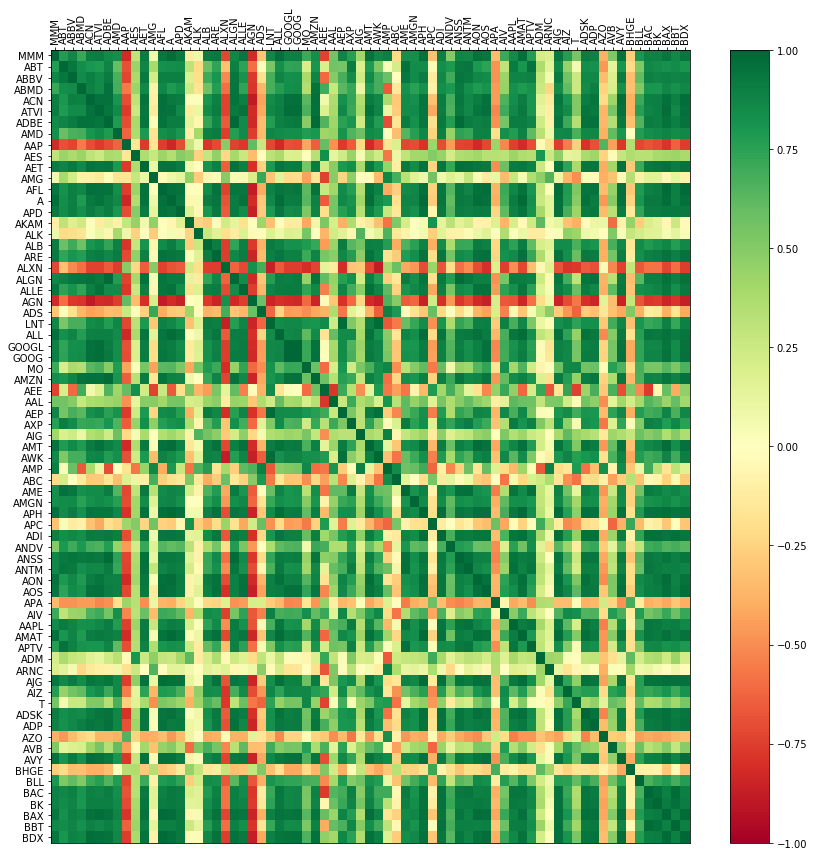

In [62]:
VISUALIZE_DATA()

In [83]:
def IGRAPH_CORRLEATION(name_csv):
    
    df_corr = pd.read_csv(name_csv)
    
    l=[]
    for row in range(len(df_corr.ix[:,1])): 
        for col in range(1,len(df_corr.ix[1,:])):
            x = df_corr.ix[row,col] 
            l.append((df_corr.columns[col],df_corr.ix[row,0], x))
                         
    return l
            
    

In [85]:
l_corr = IGRAPH_CORRLEATION('stock_corrleation.csv')
print(l_corr)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


[('MMM', 'MMM'), ('ABT', 'MMM'), ('ABBV', 'MMM'), ('ABMD', 'MMM'), ('ACN', 'MMM'), ('ATVI', 'MMM'), ('ADBE', 'MMM'), ('AMD', 'MMM'), ('AES', 'MMM'), ('AET', 'MMM'), ('AFL', 'MMM'), ('A', 'MMM'), ('APD', 'MMM'), ('ALB', 'MMM'), ('ARE', 'MMM'), ('ALGN', 'MMM'), ('ALLE', 'MMM'), ('LNT', 'MMM'), ('ALL', 'MMM'), ('GOOGL', 'MMM'), ('GOOG', 'MMM'), ('MO', 'MMM'), ('AMZN', 'MMM'), ('AAL', 'MMM'), ('AEP', 'MMM'), ('AXP', 'MMM'), ('AIG', 'MMM'), ('AMT', 'MMM'), ('AWK', 'MMM'), ('AMP', 'MMM'), ('AME', 'MMM'), ('AMGN', 'MMM'), ('APH', 'MMM'), ('ADI', 'MMM'), ('ANDV', 'MMM'), ('ANSS', 'MMM'), ('ANTM', 'MMM'), ('AON', 'MMM'), ('AOS', 'MMM'), ('AIV', 'MMM'), ('AAPL', 'MMM'), ('AMAT', 'MMM'), ('APTV', 'MMM'), ('AJG', 'MMM'), ('AIZ', 'MMM'), ('T', 'MMM'), ('ADSK', 'MMM'), ('ADP', 'MMM'), ('AVB', 'MMM'), ('AVY', 'MMM'), ('BLL', 'MMM'), ('BAC', 'MMM'), ('BK', 'MMM'), ('BAX', 'MMM'), ('BBT', 'MMM'), ('BDX', 'MMM'), ('MMM', 'ABT'), ('ABT', 'ABT'), ('ABBV', 'ABT'), ('ABMD', 'ABT'), ('ACN', 'ABT'), ('ATVI', 

In [86]:
import jgraph
jgraph.draw(l_corr, directed=False)

In [87]:
help(jgraph.draw)

Help on function draw in module jgraph.notebook:

draw(data, size=(600, 400), node_size=2.0, edge_size=0.25, default_node_color=6013150, default_edge_color=11184810, z=100, shader='basic', optimize=True, directed=True, display_html=True, show_save=False)
    Draws an interactive 3D visualization of the inputted graph.
    
    Args:
        data: Either an adjacency list of tuples (ie. [(1,2),...]) or object
        size: (Optional) Dimensions of visualization, in pixels
        node_size: (Optional) Defaults to 2.0
        edge_size: (Optional) Defaults to 0.25
        default_node_color: (Optional) If loading data without specified
            'color' properties, this will be used. Default is 0x5bc0de
        default_edge_color: (Optional) If loading data without specified
            'color' properties, this will be used. Default is 0xaaaaaa
        z: (Optional) Starting z position of the camera. Default is 100.
        shader: (Optional) Specifies shading algorithm to use. Can be 

# Preprocessing data to prepare for Machine Learning with stock data - Python Programming for Finance p.9 p.10 p.11 p.12

In [46]:
import numpy as nu
import pandas as pd
import pickle


from collection import Counter

ModuleNotFoundError: No module named 'collection'

The idea is to see what might happen if we took data from all of the current companies, and fed this through some sort of machine learning classifier. We know that, over time, various companies have different relationships with eachother, so, if the machine can recognize and fit these relationships, it's possible we could predict from changes in prices today, what will happen tomorrow with a specific company. Let's try!

Our features can be other company's prices, but we're going to instead say the features are the pricing changes that day for all companies. Our label will be whether or not we actually want to buy a specific company. Let's say we're considering Exxon (XOM). What we'll do for featuresets is take into account all company percent changes that day, and those will be our features. Our label will be whether or not Exxon (XOM) rose more than x% within the next x days, where we can pick whatever we want for x. To start, let's say a company is a buy if, within the next 7 days, its price goes up more than 2% and it is a sell if the price goes down more than 2% within those 7 days.

This is something we could also relatively easily make a strategy for. If the algorithm says buy, we can buy, place a 2% drop stop-loss (basically something that tells the exchange is price falls below this number / or goes above if you're shorting the company, then exit my position). Otherwise, sell the company once it has risen 2%, or you could be conservative and sell at 1% rise...etc. Regardless, you could relatively easily build a strategy from this classifier. In order to begin, we need the prices into the future for our training data.

In [ ]:
def PROSESS_DATA_FOR_LABELS(ticker):
    hm_days= 7 
    df=pd.reas_csv("sp500_joined_closes.csv"index_col=0)  
    tcikers=df.culumns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1,hm_days+1):
        df["{}_{}d".foramt(tikcer,i)]=(df[tickers ].shift(-i)-df[tciker])/df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers, df


In [ ]:
def BUY_SELL_HOLL(*args):
    cols=[c for s in args]
    requirement=0.02
    if col in cols:
        if col>requirement:
            return 1
        if col<-requirement:
            return -1
    return 0

In [47]:
def EXtract_FEATURESETS(ticker):
    tickers,df=PROSESS_DATA_FOR_LABELS(ticker)
    df["{}_target".format(ticker)]=list(map(BUY_SELL_HOLL,
                                           df["{}_1d".format(ticker)],
                                           df["{}_2d".format(ticker)],
                                           df["{}_3d".format(ticker)],
                                           df["{}_4d".format(ticker)],
                                           df["{}_5d".format(ticker)],
                                           df["{}_6d".format(ticker)],
                                           df["{}_7d".format(ticker)],))
    vals = df['{}_target'.foramt(tikcer)].values.tolist()
    str_vals = [str(i) for i in vals]
    print("Data spread",Counter(str_vals))
    
    df.fillna(0,inplace=True)
    
    df = df.replace([np.inf,-np.inf],np.nan)
    df.dropna(inplace= True)
    
    df_vals = df[[tikcer for ticker in tikcers]].pct_change()
    df_vals = df_vals.replace([np.inf,-np.inf],0)
    df_vals.fillna(0,inplace=True)
    
    x = df_vlas.values
    y=df['{}_target'.foramt(tikcer)]
    
    return x,y,df
# EXtract_FEATURESETS('XOM')

In [58]:
from sklearn import svm,cross_validation,neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

In [ ]:
def DO_ML(ticker):
    x,y,df=EXtract_FEATURESETS(ticker)
    x_train,x_test, y_train,y_test = cross_validation.train_test_split(x,y,test_size=0.25) 
    
    #clf=neighbors.KNeighborsCalassifier()
    clf=VotingClassifier([('lsvc',svm.linearSVC()),
                          ('Knn',neighbors.KNeighborsCalassifier()),
                          ('RandFor',RandomForestClassifier())])
     
    
    cld.fit(x_train,y_train)
    confidece = clf.score(x_test,y_test)
    
    perdication=clf.perdict(x_test)
    print('Perdicated spread:',Counter(perdications))
    
    return confidance
    

In [ ]:
do_ml('XOM')
do_ml('AAPL')
do_ml('ABT')

In [ ]:
# run this against all tickers:
from statistics import mean

with open("sp500tickers.pickle","rb") as f:
    tickers = pickle.load(f)

accuracies = []
for count,ticker in enumerate(tickers):

    if count%10==0:
        print(count)

    accuracy = do_ml(ticker)
    accuracies.append(accuracy)
    print("{} accuracy: {}. Average accuracy:{}".format(ticker,accuracy,mean(accuracies)))